In [1]:
import numpy as np
import matplotlib.pyplot as plt
import access_spectrum as acs
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/lib/python2.7/site-packages/setuptools-18.7.1-py2.7.egg/pkg_resources/__init__.py:1266: UserWarning: /home/price-jones/.python-eggs is writable by group/others and vulnerable to attack when used with get_resource_filename. Consider a more secure location (set with .set_extraction_path or the PYTHON_EGG_CACHE environment variable).


In [13]:
def compare_sample(direcs,titles,models,labels,colours):
    plt.figure(figsize=(15,8))
    for d in range(len(direcs)):
        plt.subplot(1,len(direcs),d+1)
        plt.ylim(0,1)
        plt.xlabel('eigenvectors',fontsize=14)
        plt.title(titles[d],fontsize=14)
        if d==0:
            plt.ylabel('R2',fontsize=14)
            plt.yticks(fontsize=13)
        if d!=0:
            plt.yticks([])
        c = 0
        for m in range(len(models)):
            model = acs.pklread('{0}/{1}'.format(direcs[d],models[m]))
            plt.xlim(-1,len(model.R2Array))
            # Find the number of eigenvectors at which R2 crosses R2noise
            crossvec = np.where(model.R2Array > model.R2noise)
            if crossvec[0] != []:
                crossvec = crossvec[0][0] - 1
                if crossvec < 0:
                    crossvec = 0
                plt.axvline(crossvec,0,model.R2Array[crossvec],color=colours[c],lw=2)
                plt.text(crossvec+0.03*len(model.R2Array),0.02,'{0}'.format(crossvec),
                         color=colours[c],weight='bold',fontsize=13)
            # Plot R2 curve
            plt.plot(model.R2Array,color=colours[c],lw=4,label=labels[m])
            plt.axhline(model.R2noise,color=colours[c],ls='--',lw=3)
            c+=1
        plt.xticks(np.linspace(0,len(model.R2Array),5,dtype=int)[:-1],fontsize=13)
        if d==len(direcs)-1:
            legend = plt.legend(loc='best',fontsize=13)
            legend.get_frame().set_linewidth(0.0)
    plt.subplots_adjust(wspace=0)

/usr/lib/python2.7/site-packages/ipykernel/__main__.py:19: DeprecationWarning: elementwise != comparison failed; this will raise an error in the future.



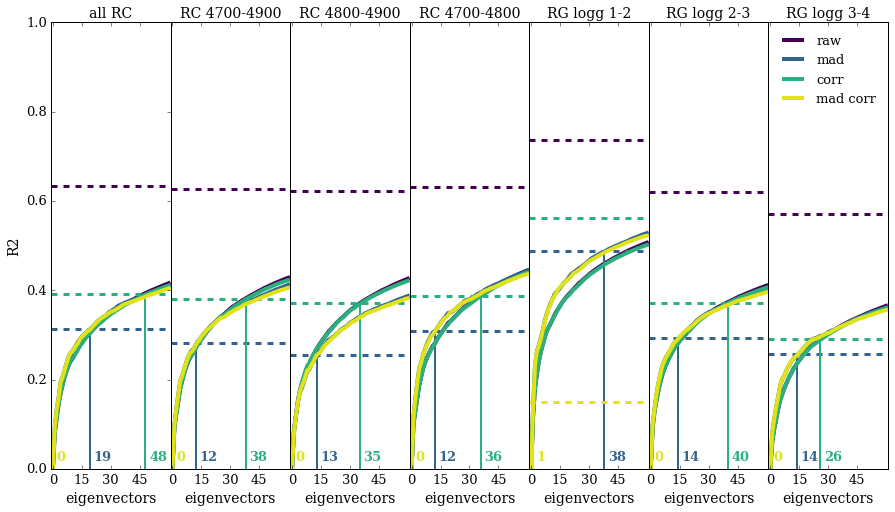

In [14]:
direcs = ['red_clump_12_TEFF_up6268.69189453_lo4130.89257812',
          'red_clump_12_TEFF_up4900.0_lo4700.0',
          'red_clump_12_TEFF_up4900.0_lo4800.0',
          'red_clump_12_TEFF_up4800.0_lo4700.0',
          'red_giant_12_LOGG_up2.0_lo1.0',
          'red_giant_12_LOGG_up3.0_lo2.0',
          'red_giant_12_LOGG_up4.0_lo3.0']
titles = ['all RC',
          'RC 4700-4900',
          'RC 4800-4900',
          'RC 4700-4800',
          'RG logg 1-2',
          'RG logg 2-3',
          'RG logg 3-4']
models = ['corrNone_madFalse.pkl',
          'corrNone_madTrue.pkl',
          'corr30px_madFalse.pkl',
          'corr30px_madTrue.pkl']
labels = ['raw','mad','corr','mad corr']
colours = plt.get_cmap('viridis')(np.linspace(0,0.95,len(models)))
compare_sample(direcs,titles,models,labels,colours)

/usr/lib/python2.7/site-packages/ipykernel/__main__.py:19: DeprecationWarning: elementwise != comparison failed; this will raise an error in the future.



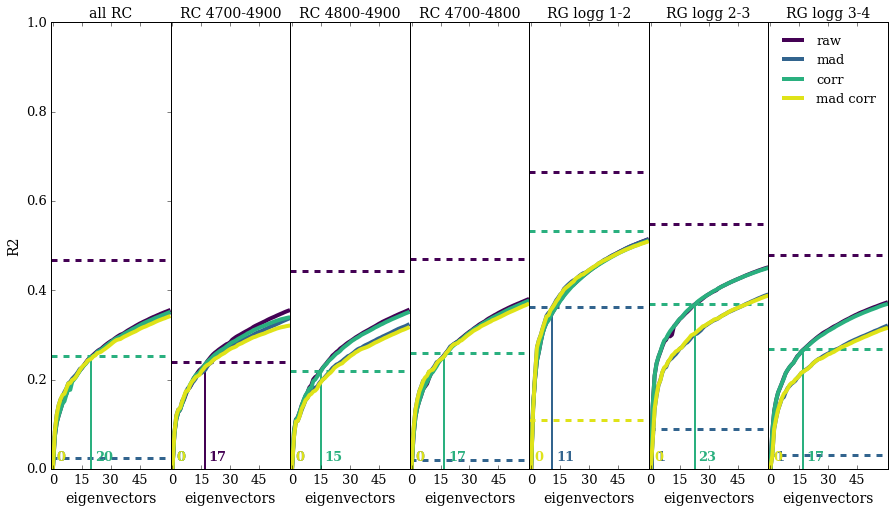

In [15]:
direcs = ['red_clump_13_TEFF_up6011.0_lo4134.5',
          'red_clump_13_TEFF_up4900.0_lo4700.0',
          'red_clump_13_TEFF_up4900.0_lo4800.0',
          'red_clump_13_TEFF_up4800.0_lo4700.0',
          'red_giant_13_LOGG_up2.0_lo1.0',
          'red_giant_13_LOGG_up3.0_lo2.0',
          'red_giant_13_LOGG_up4.0_lo3.0']
compare_sample(direcs,titles,models,labels,colours)